Testing Machine Learning models on house prices from King County Washington
Christian Zuniga, May 2019
data from https://www.kaggle.com/harlfoxem/housesalesprediction/

In [2]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
%matplotlib inline

df = pd.read_csv('kc_house_data.csv')


In [21]:
# Examine data
# "price" is the target variable for the model to predict using the available features such as
# number of bedrooms. All the data is from 2014-2015 so time may play a minor role.
# There are a total of 21613 entries. No missing values.
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB
None


In [70]:
print df.describe()

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125cc6610>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e654450>]], dtype=object)

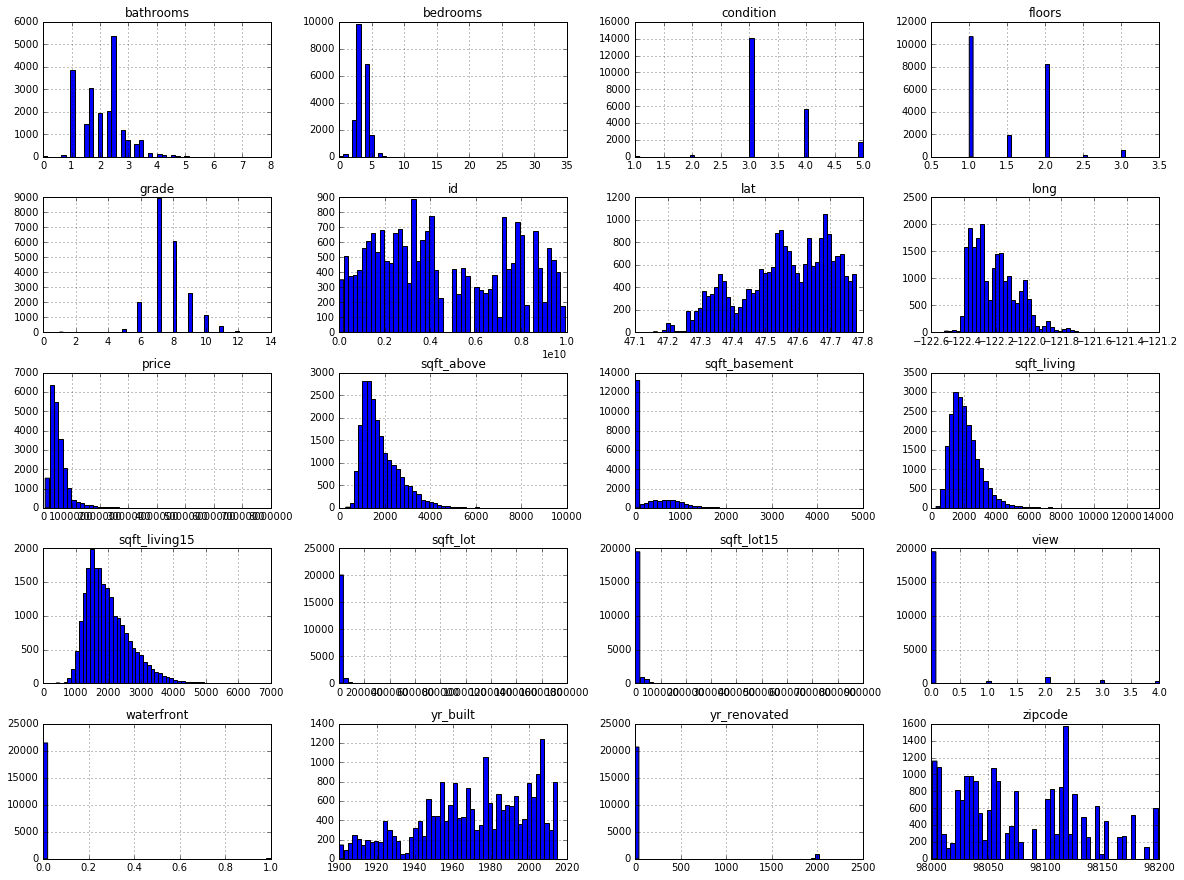

In [64]:
df.hist(bins=50,figsize=(20,15))
# some features like "view" don't have much variation and may not be important

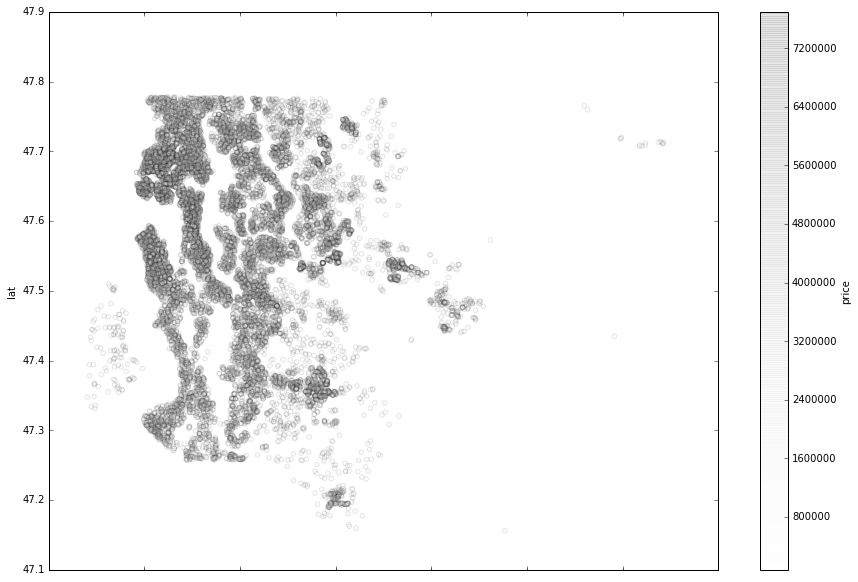

In [31]:
# Since it's common knowledge location is important in establishing a housing price, it is good
# start with this feature. Location is indicated by 3 features: latitute, longitude, and zip code.
# The plot shows a map of the Seattle area and prices tend to be higher cloer to the water.
df.plot(kind="scatter", x="long",y="lat",alpha=0.1,c='price',figsize=(15,10))

98039
98002
98039


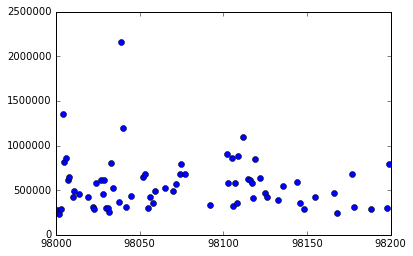

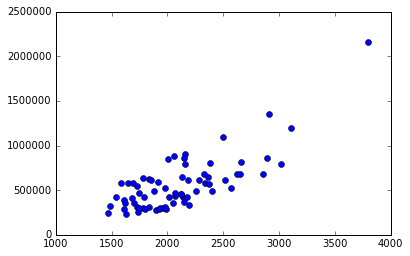

In [60]:
# Examining average housing prices by zipcodes
housingByZip = df.groupby('zipcode')
avgPriceByZip = housingByZip['price'].agg(np.mean)
avgSqftLivingByZip = housingByZip['sqft_living'].agg(np.mean)
avgYearByZip = housingByZip['yr_renovated'].agg(np.mean)
plt.plot(avgPriceByZip,'o')
print np.argmax(avgPriceByZip)
print np.argmin(avgPriceByZip)
# One zip code stands out as having the highest average housing price, 98039. A quick search 
# confirms this is the most expensive zip code in the area. 
plt.figure()
plt.plot(avgSqftLivingByZip,avgPriceByZip,'o')
print np.argmax(avgYearByZip)

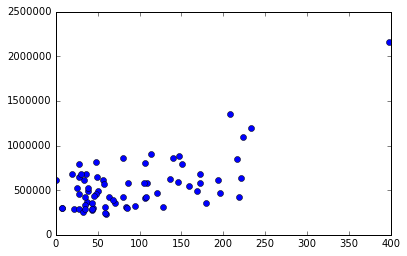

In [67]:
plt.figure()
plt.plot(avgYearByZip,avgPriceByZip,'o')

In [3]:
from scipy import stats
cols = df.columns

#print(cols[3])
#fcols = cols[3:14]
#fcols2 = fcols | cols[16:]

# remove outliers
#Select some features for regression
cols = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors","sqft_above","sqft_basement","lat","long","price"]
fcols = cols[:-1]
dfno = df[cols]
dfno = dfno[(np.abs(stats.zscore(dfno)) < 3).all(axis=1)]
print(fcols)
X = dfno[fcols]
price = dfno['price']
print(len(price))

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'lat', 'long']
20232


In [4]:
#  scale features and divide into train/test


scaler = StandardScaler()
Xs = scaler.fit_transform(X)
x_train,x_test,y_train,y_test = train_test_split(Xs, price, random_state=3)



In [6]:

regressor = LinearRegression()
regressor.fit(x_train,y_train)
# print R^2
accuracy_train = regressor.score(x_train,y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train.round(2))
print(accuracy_test.round(2))



0.57
0.56


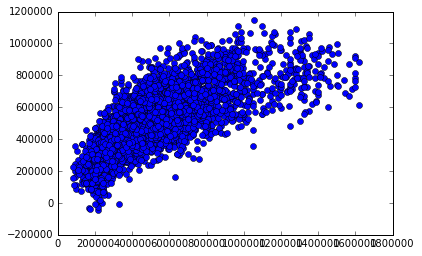

In [7]:
y_predicted = regressor.predict(x_test)
#mse =mean_squared_error(y_test,y_predicted)
#rms = np.sqrt(mse)
plt.plot(y_test,y_predicted,'o')

In [30]:
print regressor.coef_

[-24928.94354177  14395.36191659  88735.50334665    720.00679687
   -527.82765916  76623.34528042  31120.03931158  91432.15877345
 -28292.49211101]


In [8]:
# apply PCA


pca = PCA(n_components=7)
pca.fit(Xs)
print pca.explained_variance_ratio_.round(2)
kernels = pca.components_
#print kernels.shape
#print kernels[0,:]

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print "shape transformed ", x_train_pca.shape

[0.38 0.17 0.14 0.1  0.07 0.06 0.04]
shape transformed  (15174, 7)


In [9]:
regressor.fit(x_train_pca,y_train)
# print R^2
accuracy_train_pca = regressor.score(x_train_pca,y_train)
accuracy_test_pca = regressor.score(x_test_pca, y_test)
print(accuracy_train_pca.round(2))
print(accuracy_test_pca.round(2))

0.57
0.56


In [10]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(x_train_pca)
x_test_poly = poly.fit_transform(x_test_pca)

In [11]:
# do polynomial regression
regressor.fit(x_train_poly,y_train)
# print R^2
accuracy_train_poly = regressor.score(x_train_poly,y_train)
accuracy_test_poly = regressor.score(x_test_poly, y_test)
print(accuracy_train_pca.round(2))
print(accuracy_test_pca.round(2))

0.57
0.56


In [12]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1.0, random_state=42)
gbrt.fit(x_train_pca, y_train)

/Users/christiandzuniga/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [13]:
accuracy_train_gb = gbrt.score(x_train_pca,y_train)
accuracy_test_gb = gbrt.score(x_test_pca, y_test)
print "R^2"
print(accuracy_train_gb.round(2))
print(accuracy_test_gb.round(2))

R^2
0.76
0.7


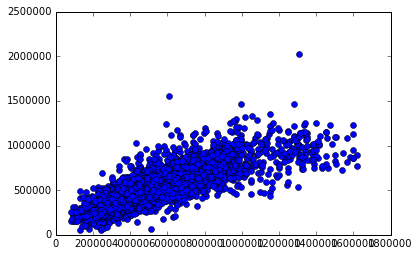

In [14]:
y_predicted_gb = gbrt.predict(x_test_pca)
#mse =mean_squared_error(y_test,y_predicted)
#rms = np.sqrt(mse)
plt.plot(y_test,y_predicted_gb,'o')

In [15]:

nn = MLPRegressor(hidden_layer_sizes=(16,16,),learning_rate='adaptive',solver='lbfgs',max_iter=5000)
nn.fit(x_train_pca,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(16, 16), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=5000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [18]:
accuracy_train_nn = nn.score(x_train_pca,y_train)
accuracy_test_nn = nn.score(x_test_pca, y_test)
print "R^2"
print(accuracy_train_nn.round(2))
print(accuracy_test_nn.round(2))

R^2
0.83
0.82


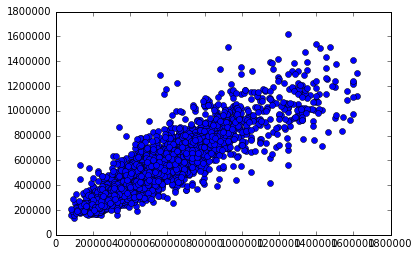

In [20]:
y_predicted_nn = nn.predict(x_test_pca)
#mse =mean_squared_error(y_test,y_predicted)
#rms = np.sqrt(mse)
plt.plot(y_test,y_predicted_nn,'o')

In [22]:
import xgboost as xgb

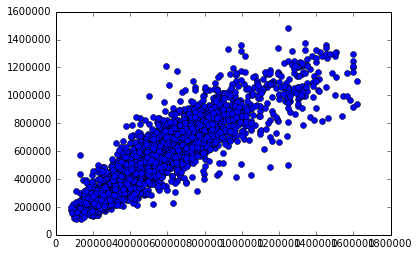

In [55]:
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'reg:linear' }
#num_round = 2
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.5, learning_rate = 0.05,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xg_reg.fit(x_train,y_train)

pred_train = xg_reg.predict(x_train)
pred_test = xg_reg.predict(x_test)

plt.plot(y_test,pred_test,'o')

In [56]:
error = y_test - pred_test
print error.shape
RSS = np.dot(error.T,error)
ytestAvg = np.mean(y_test)
dy = y_test - ytestAvg


TSS = np.dot(dy.T,dy)

print " manual R2 ", 1 - RSS/TSS

(5058,)
 manual R2  0.8270079599723026
